# Brief explanation
This notebook contains the test and results visualization for HIBA images. First, it is done over the entire dataset, and then under the reduced title results are found for the entire dataset except for  objects belonging to the classes of "Wall injuries" and "Interstitial Pattern".

#Mounting and Importing 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil, os
import zipfile
import pandas as pd
import numpy as np
from os.path import isfile, join
from glob import glob
import yaml
from tqdm.notebook import tqdm
!pip install bbox-visualizer
import bbox_visualizer as bbv
from skimage.io import imread
import cv2
import matplotlib.pyplot as plt

#Pre - Test 

In [ ]:
cwd = '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/'

# Create a .txt with the paths of each and every single image in the DS
with open(join(cwd,'test.txt'), 'w') as f:
    for path in glob('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/images/test/*'):
        f.write(path+'\n')            


data = dict(
    test = join(cwd,'test.txt'),
    nc    = 1,
    names = ['Consolidation']
)


In [ ]:
with open(join( cwd , 'test_HIBA.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

f = open(join( cwd , 'test_HIBA.yaml'), 'r')
print('\nyaml:')
print(f.read())


yaml:
names:
- Consolidation
nc: 1
test: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/test.txt



#Test

In [ ]:
os.chdir( '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5')

In [ ]:
# install dependencies
%pip install -qr requirements.txt
%pip install -r requirements.txt wandb  

     |████████████████████████████████| 645kB 35.4MB/s 
     |████████████████████████████████| 1.8MB 23.8MB/s 
     |████████████████████████████████| 102kB 14.4MB/s 
     |████████████████████████████████| 133kB 56.1MB/s 
     |████████████████████████████████| 174kB 54.9MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=787208c928f38b537fbbeab6edd51b3ff69f55f6ba6d5228ec3f64e044afa94f
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=76b79c59852878909e44e327579799a002f8b4dca0e8c5a87b84c46042484ecd
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
!python test.py --weights /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/test_HIBA.yaml --img 640 --task test --save-txt --save-conf

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/test_HIBA.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
test: Scanning '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/test.cache' images and labels... 1330 found, 0 missing, 1097 empty, 0 corrupted: 100% 1330/1330 [00:00<00:00, 12649488.25it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 

## Trying with a higher confidence threshold

In [ ]:
!python test.py --weights /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/test_HIBA.yaml --img 640 --task test --save-txt --save-conf --conf-thres 0.3

Namespace(augment=False, batch_size=32, conf_thres=0.3, data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/test_HIBA.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
test: Scanning '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/test.cache' images and labels... 1330 found, 0 missing, 1097 empty, 0 corrupted: 100% 1330/1330 [00:00<00:00, 12765273.04it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 10

#Visualize Results

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/test/exp14/labels/b4f3f067a6b611eba76ff48e3885516d.txt',header=None,sep=' ')


0    0.222320
1    0.329640
2    0.940488
3    0.750598
4    0.462990
Name: 1, dtype: float64

In [ ]:
def visualize_plot(image):
    rec = pd.read_csv(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/test/exp15/labels',f'{image}.txt'),header=None,sep=' ')
    g_t =  pd.read_csv(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/labels/test',f'{image}.txt'),header=None,sep='\t')
    sample = imread(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/images/test/',f'{image}.jpg'))

    # x dimensions of the image
    x_im,y_im = np.shape(sample) #------>ESTO ES AL REVES y_im,x_im = np.shape(sample)
    # middle of BB, normalized
    x_mid_norm = rec[1]
    gt_x_mid_norm = g_t[1]
    y_min_norm = rec[2]
    gt_y_mid_norm = g_t[1]
    # Dimensions of BBs 
    width = rec[3]
    height = rec[4]
    gt_width = g_t[3]
    gt_height = g_t[4]

    boxes = np.array([x_mid_norm*x_im,y_min_norm*y_im,width*x_im,height*y_im])
    gt_boxes = np.array([gt_x_mid_norm*x_im,gt_y_mid_norm*y_im,gt_width*x_im,gt_height*y_im])
    labels = rec[0]
    gt_labels =  g_t[0]
    confs = rec[5]
    img = cv2.cvtColor(sample,cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(10, 10))
    for box,label in zip(gt_boxes.transpose(),gt_labels):
       bbv.add_label(img, 
                      str(label), 
                      [int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2)),int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))], 
                      draw_bg=True,
                      text_bg_color=(0,0,255),
                      text_color=(0,0,0),
                        )

       cv2.rectangle(img ,
                      (int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2))),
                      (int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))),
                      (0,0,255),
                      2)


    for box,label,conf in zip(boxes.transpose(),labels,confs):
      if(conf<0.4):
        pass 
      else:
        bbv.add_label(img, 
                      str(label)+ str(conf), 
                      [int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2)),int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))], 
                      draw_bg=True,
                      text_bg_color=(255,0,0),
                      text_color=(0,0,0),
                        )

        cv2.rectangle(img ,
                      (int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2))),
                      (int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))),
                      (255,0,0),
                      2)

    plt.imshow(img)
    #print('BB anotation looks like:{}'.format(boxes.transpose()))

In [ ]:
image = df.file_name[10]
g_t =  pd.read_csv(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/labels/test',f'{image}.txt'),header=None,sep='\t')


In [ ]:
g_t

,0,1,2,3,4
0,0,0.236755,0.670575,0.331954,0.504867


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/test_hibav2.csv')
df

,file_name,class_name,height,width,x1,x2,y1,y2,label_level
0,b4ef5c3ea6b611ebabb6f48e3885516d,Consolidacion,3054,3056,838.0,1384.0,869.0,1627.0,mask
1,b4f2b7a8a6b611ebac95f48e3885516d,NoduloMasa,2735,2802,489.0,909.0,1313.0,1629.0,mask
2,b4f2b7a9a6b611ebb8abf48e3885516d,Consolidacion-Consolidacion,2544,3056,852.0,1493.0,763.0,1961.0,mask
3,b4f2b7aaa6b611ebb118f48e3885516d,Consolidacion,2364,3008,854.0,1467.0,840.0,1764.0,mask
4,b4f2b7aba6b611eb8759f48e3885516d,Consolidacion,2500,2048,349.0,773.0,636.0,1131.0,mask
...,...,...,...,...,...,...,...,...,...
1325,b4f7e7e8a6b611eb9da7f48e3885516d,NaN,2342,2928,NaN,NaN,NaN,NaN,nofinding
1326,b4f7e7e9a6b611eb8c44f48e3885516d,NaN,2314,2360,NaN,NaN,NaN,NaN,nofinding
1327,b4f7e7eaa6b611eb8699f48e3885516d,NaN,2540,3056,NaN,NaN,NaN,NaN,nofinding
1328,b4f7e7eba6b611ebb13bf48e3885516d,NaN,2544,3056,NaN,NaN,NaN,NaN,nofinding


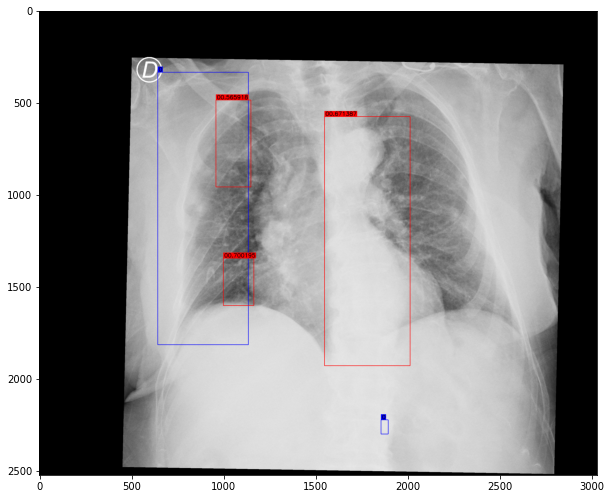

In [ ]:
visualize_plot(df.file_name[39])


In [ ]:
image = df.file_name[10]
rec = pd.read_csv(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/test/exp15/labels',f'{image}.txt'),header=None,sep=' ')


# Reduced DS  Test 

In [ ]:
cwd = '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/'

# Create a .txt with the paths of each and every single image in the DS
with open(join(cwd,'test.txt'), 'w') as f:
    for path in glob('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/images/test/*'):
        f.write(path+'\n')            


data = dict(
    test = join(cwd,'test.txt'),
    nc    = 1,
    names = ['Consolidation']
)

In [ ]:
with open(join( cwd , 'red_test_HIBA.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

f = open(join( cwd , 'red_test_HIBA.yaml'), 'r')
print('\nyaml:')
print(f.read())


yaml:
names:
- Consolidation
nc: 1
test: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/test.txt



In [ ]:
!python test.py --weights /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/red_test_HIBA.yaml --img 640 --task test --save-txt --save-conf

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/red_test_HIBA.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
test: Scanning '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/test' images and labels... 1232 found, 0 missing, 1097 empty, 0 corrupted: 100% 1232/1232 [05:24<00:00,  3.80it/s]
test: New cache created: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Pa

In [ ]:
!python test.py --weights /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/red_test_HIBA.yaml --img 640 --task test --save-txt --save-conf --conf-thres 0.15

Namespace(augment=False, batch_size=32, conf_thres=0.15, data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/red_test_HIBA.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
test: Scanning '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/test.cache' images and labels... 1232 found, 0 missing, 1097 empty, 0 corrupted: 100% 1232/1232 [00:00<00:00, 11282494.60it/s]
               Class      Images      Labels           P           R     

In [ ]:
!python test.py --weights /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/red_test_HIBA.yaml --img 640 --task test --save-txt --save-conf --conf-thres 0.3

Namespace(augment=False, batch_size=32, conf_thres=0.3, data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/red_test_HIBA.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
test: Scanning '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/test.cache' images and labels... 1232 found, 0 missing, 1097 empty, 0 corrupted: 100% 1232/1232 [00:00<00:00, 11136600.28it/s]
               Class      Images      Labels           P           R      

In [ ]:
# This is wrong! No including no finding images.
!python test.py --weights /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced/red_test_HIBA.yaml --img 640 --task test --save-txt --save-conf

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced/red_test_HIBA.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp12/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87198694 parameters, 0 gradients, 217.1 GFLOPS
test: Scanning '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced/test' images and labels... 107 found, 0 missing, 7 empty, 0 corrupted: 100% 107/107 [01:16<00:00,  1.40it/s]
test: New cache created: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS

## Visualize Reduced 

In [10]:
def visualize_plot2(image):
  rec_m = 0 
  g_t_m = 0 
  try:
    rec = pd.read_csv(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/test/exp36/labels/',f'{image}.txt'),header=None,sep=' ')
  except:
    rec_m = 1  

  try:
      g_t =  pd.read_csv(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/labels/test/',f'{image}.txt'),header=None,sep='\t')
  except:
      g_t_m = 1    
    
  sample = imread(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced2/images/test/',f'{image}.jpg'))
  img = cv2.cvtColor(sample,cv2.COLOR_GRAY2RGB)
  plt.figure(figsize=(10, 10))
  # x dimensions of the image
  y_im,x_im = np.shape(sample)

  if(g_t_m==0):
    gt_x_mid_norm = g_t[1]
    gt_y_mid_norm = g_t[2]
    gt_width = g_t[3]
    gt_height = g_t[4]
    gt_boxes = np.array([gt_x_mid_norm*x_im,gt_y_mid_norm*y_im,gt_width*x_im,gt_height*y_im])
    gt_labels =  g_t[0]
    for box,label in zip(gt_boxes.transpose(),gt_labels):
      bbv.add_label(img,str(label), 
                    [int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2)),int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))], 
                    draw_bg=True,
                    text_bg_color=(0,0,255),
                    text_color=(0,0,0),
                      )

      cv2.rectangle(img ,
                    (int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2))),
                    (int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))),
                    (0,0,255),
                      2)

  if(rec_m==0):
    # middle of BB, normalized
    x_mid_norm = rec[1]
    y_min_norm = rec[2]
    # Dimensions of BBs 
    width = rec[3]
    height = rec[4]
    boxes = np.array([x_mid_norm*x_im,y_min_norm*y_im,width*x_im,height*y_im])
    labels = rec[0]
    confs = rec[5]

    for box,label,conf in zip(boxes.transpose(),labels,confs):
      if(conf<0.4):
        pass 
      else:
        bbv.add_label(img, 
                      str(label)+ str(conf), 
                      [int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2)),int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))], 
                      draw_bg=True,
                      text_bg_color=(255,0,0),
                      text_color=(0,0,0),
                        )

        cv2.rectangle(img ,
                    (int(round(box[0]-box[2]/2)), int(round(box[1]-box[3]/2))),
                    (int(round(box[0]+box[2]/2)), int(round(box[1]+box[3]/2))),
                    (255,0,0),
                    2)

  #plt.imshow(img)
  return img
    #print('BB anotation looks like:{}'.format(boxes.transpose()))

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced/total.csv')
df

,Unnamed: 0,Unnamed: 0.1,boxes,labels,image,height,width,class,x_min,y_min,x_max,y_max,x_mid,y_mid,w,h,area,file_name,class_name,x1,x2,y1,y2,label_level
0,1255,NaN,NaN,NaN,NaN,2735,2802.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f59dfca6b611ebbca4f48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
1,288,NaN,NaN,NaN,NaN,2484,2252.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f3061ba6b611ebabedf48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
2,1301,NaN,NaN,NaN,NaN,2580,2404.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f5c50fa6b611eb84cbf48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
3,1133,NaN,NaN,NaN,NaN,2782,2932.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f528c0a6b611ebae48f48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
4,508,NaN,NaN,NaN,NaN,2540,3056.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f35438a6b611eba57ff48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,937,NaN,NaN,NaN,NaN,2858,2990.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f48c80a6b611eb96a5f48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
1280,87,0.0,"[2119, 1141, 2331, 1321]",1.0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,2544,2676.0,Consolidation,0.791854,0.448506,0.871076,0.519261,0.831465,0.483884,0.079223,0.070755,0.005605,b4f2dec0a6b611eb92f8f48e3885516d,NaN,NaN,NaN,NaN,NaN,NaN
1281,721,NaN,NaN,NaN,NaN,2361,2704.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f3f03ea6b611eba29bf48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
1282,568,NaN,NaN,NaN,NaN,2735,2802.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f37b2ca6b611eba03ef48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding


In [ ]:
df[df['class']=='Consolidation']

,Unnamed: 0,Unnamed: 0.1,boxes,labels,image,height,width,class,x_min,y_min,x_max,y_max,x_mid,y_mid,w,h,area,file_name,class_name,x1,x2,y1,y2,label_level
13,268,0.0,"[309, 1340, 892, 2013]",2.0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,2585,2666.0,Consolidation,0.115904,0.518375,0.334584,0.778723,0.225244,0.648549,0.218680,0.260348,0.056933,b4f2df2fa6b611eb9081f48e3885516d,NaN,NaN,NaN,NaN,NaN,NaN
23,142,0.0,"[441, 1974, 746, 2210]",1.0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,2544,3056.0,Consolidation,0.144306,0.775943,0.244110,0.868711,0.194208,0.822327,0.099804,0.092767,0.009259,b4f2ded9a6b611ebba22f48e3885516d,NaN,NaN,NaN,NaN,NaN,NaN
32,57,1.0,"[776, 433, 1368, 1663]",1.0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,2520,3032.0,Consolidation,0.255937,0.171825,0.451187,0.659921,0.353562,0.415873,0.195251,0.488095,0.095301,b4f2b7cea6b611eb8303f48e3885516d,NaN,NaN,NaN,NaN,NaN,NaN
34,369,1.0,"[1485, 773, 2005, 1661]",2.0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,2048,2500.0,Consolidation,0.594000,0.377441,0.802000,0.811035,0.698000,0.594238,0.208000,0.433594,0.090188,b4f305e0a6b611ebbb3ef48e3885516d,NaN,NaN,NaN,NaN,NaN,NaN
36,244,0.0,"[778, 475, 1533, 1392]",2.0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,2520,3032.0,Consolidation,0.256596,0.188492,0.505607,0.552381,0.381102,0.370437,0.249011,0.363889,0.090612,b4f2df1ba6b611eb8f65f48e3885516d,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,91,0.0,"[605, 1749, 978, 1904]",2.0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,2544,3056.0,Consolidation,0.197971,0.687500,0.320026,0.748428,0.258999,0.717964,0.122055,0.060928,0.007437,b4f2dec1a6b611eb8758f48e3885516d,NaN,NaN,NaN,NaN,NaN,NaN
1258,144,1.0,"[326, 1335, 1053, 1511]",4.0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,2544,3056.0,Consolidation,0.106675,0.524764,0.344568,0.593947,0.225622,0.559355,0.237893,0.069182,0.016458,b4f2dedaa6b611eba9d0f48e3885516d,NaN,NaN,NaN,NaN,NaN,NaN
1270,204,0.0,"[1836, 994, 1910, 1058]",1.0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,2573,2700.0,Consolidation,0.680000,0.386319,0.707407,0.411193,0.693704,0.398756,0.027407,0.024874,0.000682,b4f2df01a6b611ebbf1bf48e3885516d,NaN,NaN,NaN,NaN,NaN,NaN
1272,32,2.0,"[2043, 972, 2289, 1147]",2.0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,2544,3056.0,Consolidation,0.668521,0.382075,0.749018,0.450865,0.708770,0.416470,0.080497,0.068789,0.005537,b4f2b7bea6b611eb95fef48e3885516d,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.file_name[0]

'b4f59dfca6b611ebbca4f48e3885516d'

In [ ]:
df.file_name[0]

'b4f59dfca6b611ebbca4f48e3885516d'

In [12]:
type(visualize_plot2(df.file_name[0]))

numpy.ndarray

<Figure size 720x720 with 0 Axes>

In [15]:
from cv2 import imwrite
for index, row in df.iterrows():
  imwrite('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/Results/'+ str(row['file_name']) +'.jpg',visualize_plot2(row['file_name']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

b4f3061ba6b611ebabedf48e3885516d No finding


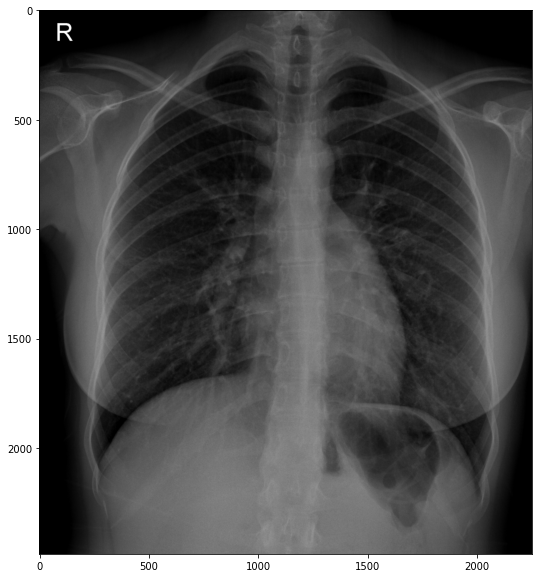

In [ ]:
im = 1
visualize_plot2(df.file_name[im])
print(df.file_name[im],df['class'][im])

b4f5c50fa6b611eb84cbf48e3885516d No finding


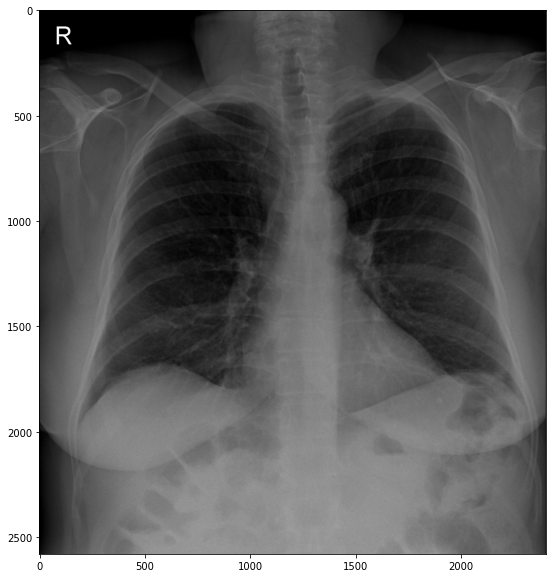

In [ ]:
im = 2
visualize_plot2(df.file_name[im])
print(df.file_name[im],df['class'][im])

b4f528c0a6b611ebae48f48e3885516d No finding


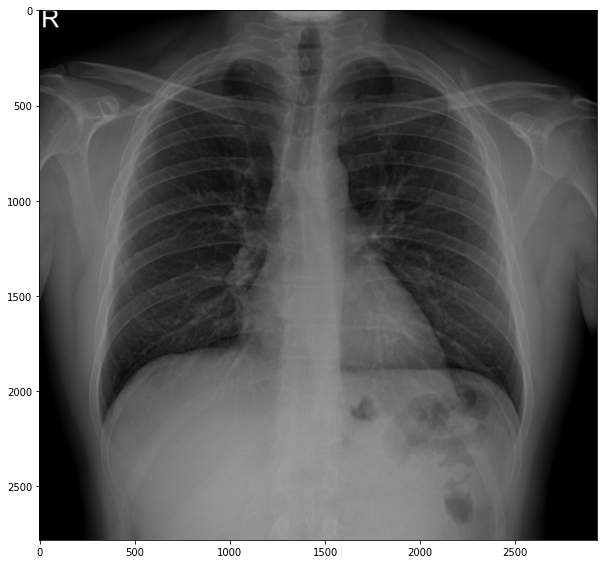

In [ ]:
im = 3
visualize_plot2(df.file_name[im])
print(df.file_name[im],df['class'][im])

b4f35438a6b611eba57ff48e3885516d No finding


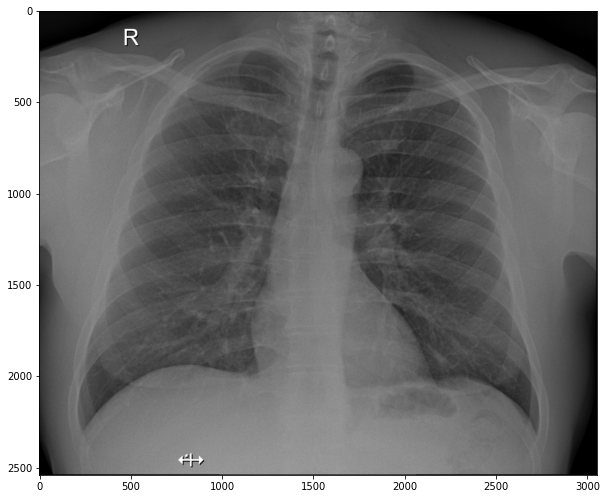

In [ ]:
im = 4
visualize_plot2(df.file_name[im])
print(df.file_name[im],df['class'][im])

b4f2dec0a6b611eb92f8f48e3885516d Consolidation


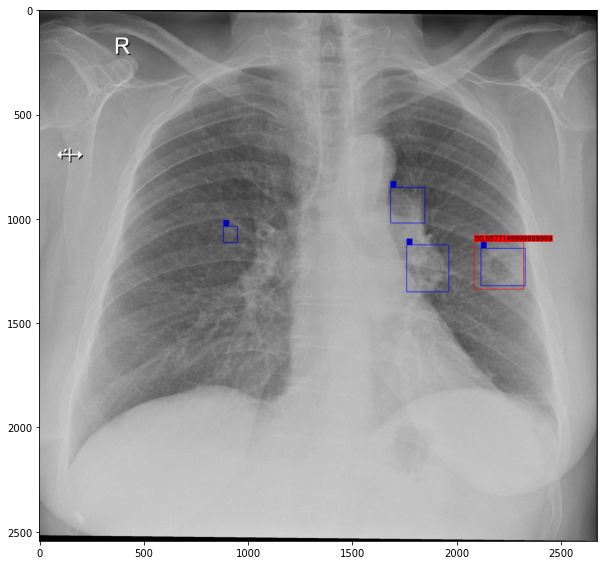

In [ ]:
im = 1280
visualize_plot2(df.file_name[im])
print(df.file_name[im],df['class'][im])

b4f2df2fa6b611eb9081f48e3885516d Consolidation


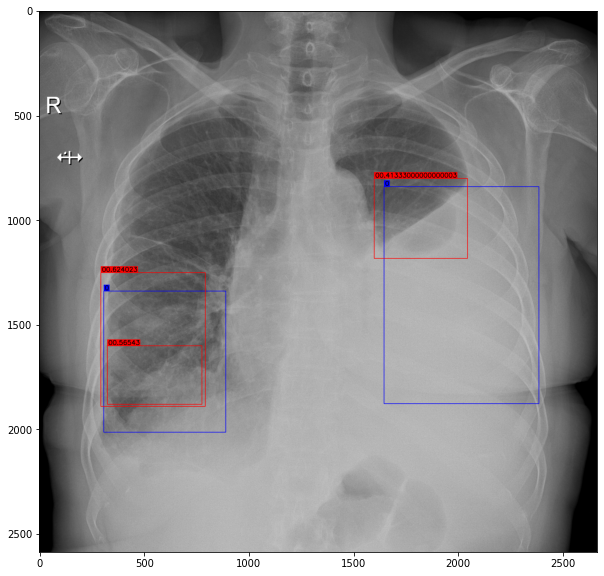

In [ ]:
im = 13
image = visualize_plot2(df.file_name[im])
print(df.file_name[im],df['class'][im])

b4f2df2fa6b611eb9081f48e3885516d Consolidation


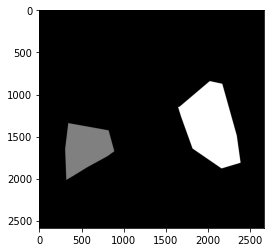

In [ ]:
import numpy as np
img_array = np.load(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/masks/',f'{df.file_name[im]}.npy'))
from matplotlib import pyplot as plt
print(df.file_name[im],df['class'][im])
plt.imshow(img_array, cmap='gray')
plt.show()


b4f2df2fa6b611eb9081f48e3885516d


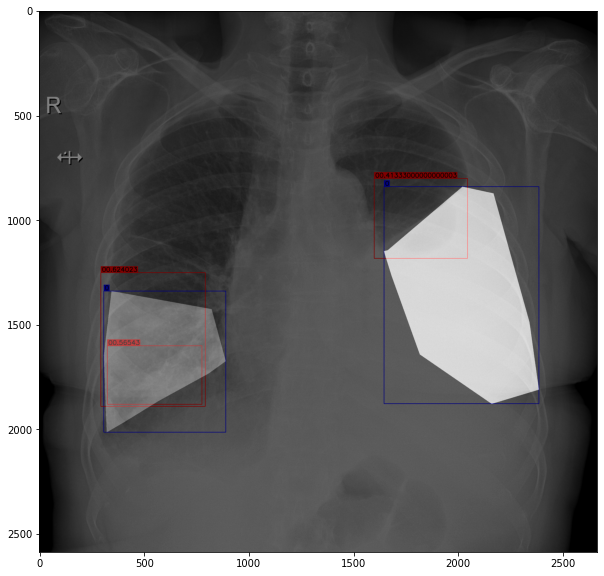

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray') 
plt.imshow(img_array, cmap='gray', alpha=0.5)
print(df.file_name[im])

b4f2b7cea6b611eb8303f48e3885516d Consolidation


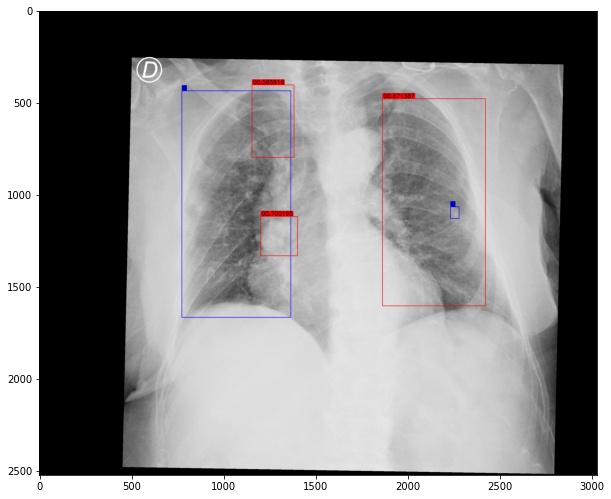

In [ ]:
im = 32
visualize_plot2(df.file_name[im])
print(df.file_name[im],df['class'][im])

b4f2ded9a6b611ebba22f48e3885516d Consolidation


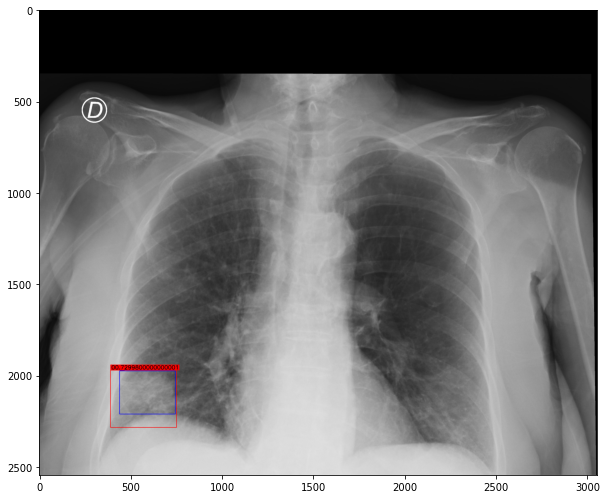

In [ ]:
im = 23
image = visualize_plot2(df.file_name[im])
print(df.file_name[im],df['class'][im])

b4f2ded9a6b611ebba22f48e3885516d Consolidation


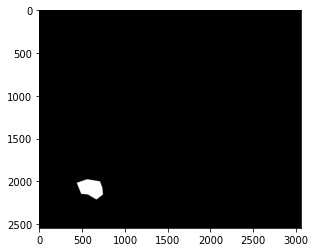

In [ ]:
import numpy as np
img_array = np.load(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/masks/',f'{df.file_name[im]}.npy'))
from matplotlib import pyplot as plt
print(df.file_name[im],df['class'][im])
plt.imshow(img_array, cmap='gray')
plt.show()


b4f2ded9a6b611ebba22f48e3885516d


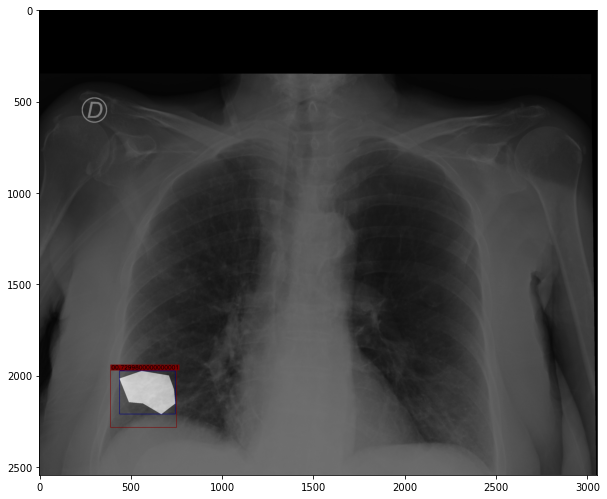

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray') 
plt.imshow(img_array, cmap='gray', alpha=0.5)
print(df.file_name[im])

b4f305e0a6b611ebbb3ef48e3885516d Consolidation


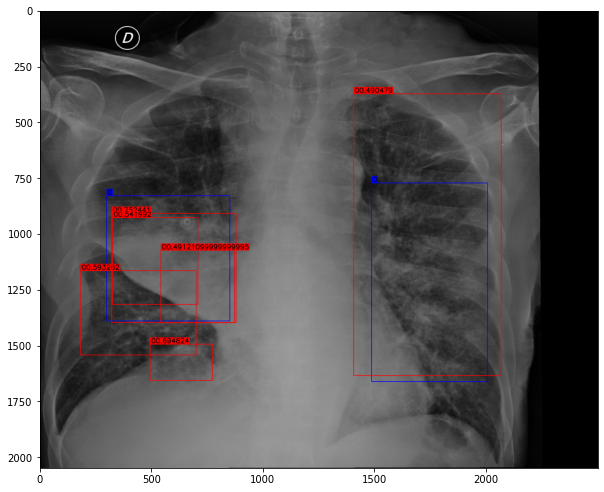

In [ ]:
im = 34
visualize_plot2(df.file_name[im])
print(df.file_name[im],df['class'][im])

b4f2df1ba6b611eb8f65f48e3885516d Consolidation


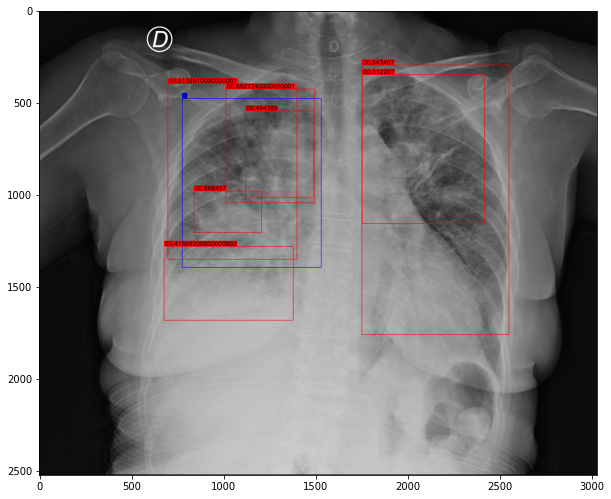

In [ ]:
im = 36
image = visualize_plot2(df.file_name[im])
print(df.file_name[im],df['class'][im])

b4f2df1ba6b611eb8f65f48e3885516d Consolidation


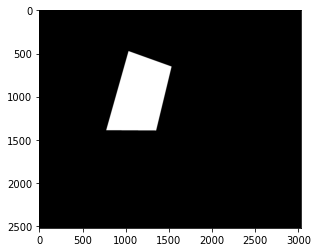

In [ ]:
import numpy as np
img_array = np.load(os.path.join('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/masks/',f'{df.file_name[im]}.npy'))
from matplotlib import pyplot as plt
print(df.file_name[im],df['class'][im])
plt.imshow(img_array, cmap='gray')
plt.show()


b4f2df1ba6b611eb8f65f48e3885516d


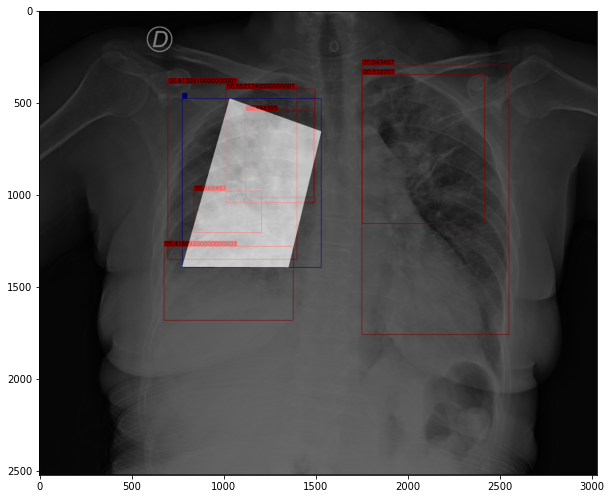

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray') 
plt.imshow(img_array, cmap='gray', alpha=0.5)
print(df.file_name[im])

# Preparing for logistic regression

In [ ]:
results = pd.DataFrame()
DIR = '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/test/exp36/labels'
for name in os.listdir(DIR):
  f = open(join(DIR,name))
  try:
    lines = f.readlines()
    file = pd.DataFrame(lines, columns = ["alls"])
    file[['class_name','x_mid','y_mid','w','h','confidence']] = file.alls.str.split(expand=True,)
    file['alls'] = name.split('.')[0]
    file = file.rename(columns={'alls':'file_name'})
    results.append(file)
    results = pd.concat([results, file]) 
  finally:
    f.close()
  
results.head()

,file_name,class_name,x_mid,y_mid,w,h,confidence
0,b4f3a23ea6b611eb810df48e3885516d,0,0.535726,0.0426233,0.348026,0.0852466,0.0457764
1,b4f3a23ea6b611eb810df48e3885516d,0,0.28414,0.096301,0.321729,0.192602,0.0438843
2,b4f3a23ea6b611eb810df48e3885516d,0,0.558016,0.364583,0.118876,0.234269,0.0348206
3,b4f3a23ea6b611eb810df48e3885516d,0,0.792054,0.119473,0.327301,0.238946,0.0199585
4,b4f3a23ea6b611eb810df48e3885516d,0,0.740632,0.709184,0.350373,0.154762,0.00556946


In [ ]:
results.to_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/results_hiba.csv')

In [ ]:
results['confidence'] = results['confidence'].astype(float)

In [ ]:
bb_counts = results.groupby(['file_name'])['class_name'].count() 
bb_counts

file_name
b4ef5c3ea6b611ebabb6f48e3885516d     52
b4f2b7a8a6b611ebac95f48e3885516d     40
b4f2b7a9a6b611ebb8abf48e3885516d    178
b4f2b7aaa6b611ebb118f48e3885516d     56
b4f2b7aba6b611eb8759f48e3885516d    117
                                   ... 
b4f7e7e8a6b611eb9da7f48e3885516d     16
b4f7e7e9a6b611eb8c44f48e3885516d     29
b4f7e7eaa6b611eb8699f48e3885516d     16
b4f7e7eba6b611ebb13bf48e3885516d     28
b4f7e7eca6b611ebbed2f48e3885516d     42
Name: class_name, Length: 1232, dtype: int64

In [ ]:
bb_max = results.groupby('file_name')['confidence'].max()
bb_max

file_name
b4ef5c3ea6b611ebabb6f48e3885516d    0.761719
b4f2b7a8a6b611ebac95f48e3885516d    0.740234
b4f2b7a9a6b611ebb8abf48e3885516d    0.727539
b4f2b7aaa6b611ebb118f48e3885516d    0.741699
b4f2b7aba6b611eb8759f48e3885516d    0.795898
                                      ...   
b4f7e7e8a6b611eb9da7f48e3885516d    0.110840
b4f7e7e9a6b611eb8c44f48e3885516d    0.021820
b4f7e7eaa6b611eb8699f48e3885516d    0.087036
b4f7e7eba6b611ebb13bf48e3885516d    0.643555
b4f7e7eca6b611ebbed2f48e3885516d    0.699219
Name: confidence, Length: 1232, dtype: float64

In [ ]:
bb_median = results.groupby('file_name')['confidence'].median()
bb_median

file_name
b4ef5c3ea6b611ebabb6f48e3885516d    0.003543
b4f2b7a8a6b611ebac95f48e3885516d    0.002604
b4f2b7a9a6b611ebb8abf48e3885516d    0.003871
b4f2b7aaa6b611ebb118f48e3885516d    0.003333
b4f2b7aba6b611eb8759f48e3885516d    0.004112
                                      ...   
b4f7e7e8a6b611eb9da7f48e3885516d    0.003486
b4f7e7e9a6b611eb8c44f48e3885516d    0.002285
b4f7e7eaa6b611eb8699f48e3885516d    0.003656
b4f7e7eba6b611ebb13bf48e3885516d    0.002134
b4f7e7eca6b611ebbed2f48e3885516d    0.004519
Name: confidence, Length: 1232, dtype: float64

In [ ]:
bb_mean = results.groupby('file_name')['confidence'].mean()
bb_mean

file_name
b4ef5c3ea6b611ebabb6f48e3885516d    0.058247
b4f2b7a8a6b611ebac95f48e3885516d    0.065058
b4f2b7a9a6b611ebb8abf48e3885516d    0.044015
b4f2b7aaa6b611ebb118f48e3885516d    0.067561
b4f2b7aba6b611eb8759f48e3885516d    0.036850
                                      ...   
b4f7e7e8a6b611eb9da7f48e3885516d    0.016807
b4f7e7e9a6b611eb8c44f48e3885516d    0.004501
b4f7e7eaa6b611eb8699f48e3885516d    0.015107
b4f7e7eba6b611ebb13bf48e3885516d    0.028459
b4f7e7eca6b611ebbed2f48e3885516d    0.044690
Name: confidence, Length: 1232, dtype: float64

In [ ]:
res = pd.concat([bb_counts, bb_max,bb_mean,bb_median], axis=1)
res 

,class_name,confidence,confidence,confidence
file_name,,,,
b4ef5c3ea6b611ebabb6f48e3885516d,52,0.761719,0.058247,0.003543
b4f2b7a8a6b611ebac95f48e3885516d,40,0.740234,0.065058,0.002604
b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871
b4f2b7aaa6b611ebb118f48e3885516d,56,0.741699,0.067561,0.003333
b4f2b7aba6b611eb8759f48e3885516d,117,0.795898,0.036850,0.004112
...,...,...,...,...
b4f7e7e8a6b611eb9da7f48e3885516d,16,0.110840,0.016807,0.003486
b4f7e7e9a6b611eb8c44f48e3885516d,29,0.021820,0.004501,0.002285
b4f7e7eaa6b611eb8699f48e3885516d,16,0.087036,0.015107,0.003656


In [ ]:
res.rename(columns={ res.columns[0]: "bb_counts", res.columns[1]: "bb_cmax", res.columns[2]: "bb_cmean", res.columns[3]: "bb_cmedian" }, inplace = True)
res

,bb_counts,bb_cmedian,bb_cmedian,bb_cmedian
file_name,,,,
b4ef5c3ea6b611ebabb6f48e3885516d,52,0.761719,0.058247,0.003543
b4f2b7a8a6b611ebac95f48e3885516d,40,0.740234,0.065058,0.002604
b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871
b4f2b7aaa6b611ebb118f48e3885516d,56,0.741699,0.067561,0.003333
b4f2b7aba6b611eb8759f48e3885516d,117,0.795898,0.036850,0.004112
...,...,...,...,...
b4f7e7e8a6b611eb9da7f48e3885516d,16,0.110840,0.016807,0.003486
b4f7e7e9a6b611eb8c44f48e3885516d,29,0.021820,0.004501,0.002285
b4f7e7eaa6b611eb8699f48e3885516d,16,0.087036,0.015107,0.003656


In [ ]:
fss = pd.read_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/reduced/total.csv')
fss

,Unnamed: 0,Unnamed: 0.1,boxes,labels,image,height,width,class,x_min,y_min,x_max,y_max,x_mid,y_mid,w,h,area,file_name,class_name,x1,x2,y1,y2,label_level
0,1255,NaN,NaN,NaN,NaN,2735,2802.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f59dfca6b611ebbca4f48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
1,288,NaN,NaN,NaN,NaN,2484,2252.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f3061ba6b611ebabedf48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
2,1301,NaN,NaN,NaN,NaN,2580,2404.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f5c50fa6b611eb84cbf48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
3,1133,NaN,NaN,NaN,NaN,2782,2932.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f528c0a6b611ebae48f48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
4,508,NaN,NaN,NaN,NaN,2540,3056.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f35438a6b611eba57ff48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,937,NaN,NaN,NaN,NaN,2858,2990.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f48c80a6b611eb96a5f48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
1280,87,0.0,"[2119, 1141, 2331, 1321]",1.0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,2544,2676.0,Consolidation,0.791854,0.448506,0.871076,0.519261,0.831465,0.483884,0.079223,0.070755,0.005605,b4f2dec0a6b611eb92f8f48e3885516d,NaN,NaN,NaN,NaN,NaN,NaN
1281,721,NaN,NaN,NaN,NaN,2361,2704.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f3f03ea6b611eba29bf48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding
1282,568,NaN,NaN,NaN,NaN,2735,2802.0,No finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4f37b2ca6b611eba03ef48e3885516d,No finding,NaN,NaN,NaN,NaN,nofinding


In [ ]:
fss2 = fss[['file_name','class']]
fss2

,file_name,class
0,b4f59dfca6b611ebbca4f48e3885516d,No finding
1,b4f3061ba6b611ebabedf48e3885516d,No finding
2,b4f5c50fa6b611eb84cbf48e3885516d,No finding
3,b4f528c0a6b611ebae48f48e3885516d,No finding
4,b4f35438a6b611eba57ff48e3885516d,No finding
...,...,...
1279,b4f48c80a6b611eb96a5f48e3885516d,No finding
1280,b4f2dec0a6b611eb92f8f48e3885516d,Consolidation
1281,b4f3f03ea6b611eba29bf48e3885516d,No finding
1282,b4f37b2ca6b611eba03ef48e3885516d,No finding


In [ ]:
fss2.index = fss2['file_name']

In [ ]:
final_res = res.join(fss2)
final_res

,bb_counts,bb_cmedian,bb_cmedian,bb_cmedian,file_name,class
file_name,,,,,,
b4ef5c3ea6b611ebabb6f48e3885516d,52,0.761719,0.058247,0.003543,b4ef5c3ea6b611ebabb6f48e3885516d,Consolidation
b4f2b7a8a6b611ebac95f48e3885516d,40,0.740234,0.065058,0.002604,b4f2b7a8a6b611ebac95f48e3885516d,Consolidation
b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871,b4f2b7a9a6b611ebb8abf48e3885516d,Consolidation
b4f2b7a9a6b611ebb8abf48e3885516d,178,0.727539,0.044015,0.003871,b4f2b7a9a6b611ebb8abf48e3885516d,Consolidation
b4f2b7aaa6b611ebb118f48e3885516d,56,0.741699,0.067561,0.003333,b4f2b7aaa6b611ebb118f48e3885516d,Consolidation
...,...,...,...,...,...,...
b4f7e7e8a6b611eb9da7f48e3885516d,16,0.110840,0.016807,0.003486,b4f7e7e8a6b611eb9da7f48e3885516d,No finding
b4f7e7e9a6b611eb8c44f48e3885516d,29,0.021820,0.004501,0.002285,b4f7e7e9a6b611eb8c44f48e3885516d,No finding
b4f7e7eaa6b611eb8699f48e3885516d,16,0.087036,0.015107,0.003656,b4f7e7eaa6b611eb8699f48e3885516d,No finding


In [ ]:
final_res.to_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/DS_VAL_OD/unzipped_v2/final_results_hiba.csv')